# Package Usage

In [1]:
from clingraph import Clingraph

### Create a clingraph from string

In [2]:
g = Clingraph()
g.add_fact_string('node(oscar). node(andres). edge((oscar,andres)). attr(node,andres,label,"Mai").attr(edge,(oscar,andres),label,"friends").')
g.compute_graphs()

##### Show graphs in the UI

Graph saved in out/default.png


'default'

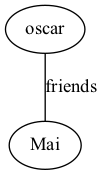

In [3]:
g.show()

##### Print a clingraph

In [4]:
print(g)

//----------default----------
graph default {
	oscar
	andres [label=Mai]
	oscar -- andres [label=friends]
}



### Create a clingraph from file

Graph saved in out/toms_family.png
Graph saved in out/bills_family.png


'toms_family'

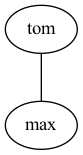

'bills_family'

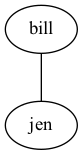

In [5]:
g = Clingraph()
g.add_fact_file("examples/basic/example2/example_2.lp")
g.compute_graphs()
g.show()

Graph saved in out/toms_family.png


'toms_family'

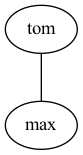

In [6]:
g.show(graph_names=['toms_family'])

##### Show source code for one graph

In [7]:
print(g.graphs["toms_family"].source)

graph toms_family {
	tom
	max
	tom -- max
}



##### Save all graphs 

In [8]:
g.save(directory="out",format="pdf")

Graph saved in out/toms_family.pdf
Graph saved in out/bills_family.pdf


### Create a graph from clingos solve

Graph saved in out/images/0.png
Graph saved in out/images/1.png
Graph saved in out/images/2.png
Graph saved in out/images/3.png
Graph saved in out/images/4.png
Graph saved in out/images/5.png
Graph saved in out/images/6.png
Graph saved in out/images/7.png
Graph saved in out/images/8.png
Graph saved in out/images/9.png
Graph saved in out/images/10.png
Graph saved in out/images/11.png
Graph saved in out/images/12.png
Graph saved in out/images/13.png
Graph saved in out/images/14.png
Graph saved in out/images/15.png


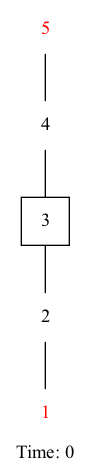

In [9]:
from clingo import Control
from clingo.script import enable_python
ctl = Control()
g = Clingraph()
ctl.load("./examples/elevator/encoding.lp")
ctl.load("./examples/elevator/viz.lp")
ctl.load("./examples/elevator/instance.lp")
ctl.ground([("base", [])])
ctl.solve(on_model=g.add_model)
g.compute_graphs()
g.show_gif(engine="neato",fps=1)